## 1. Imports
<p>
Numpy: Math related stuff but mainly for linear algebra.
</p>
<p>
Pandas: Importing and processing data.
</p>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pathlib
import imageio
import PIL
from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers, models, datasets

import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(69)

## 2. Data Organization
Now that we have defined our imports, lets go ahead and get our data imported and organized.

In [2]:
# Get raw images from the Makeup collection and sort them checking they are unique.
raw_images = pathlib.Path('/kaggle/input/make-up-vs-no-make-up/data/data/makeup').glob('*.jpeg')
sorted_images_makeup = sorted([ image for image in raw_images])

standard_width = 128
standard_height = 128
image_channels = 3
training_data = np.empty([None,150,150,3])

# Path stores the relative path to the image while the makeup stores a boolean.
# Think about it as the input and the output of the CNN.
for path in sorted_images_makeup:
    image = Image.open(str(path))
    image = image.resize((150,150))
    data.append
    data.append([image,150,150,3, "True"])

# Get raw images from the No Makeup collection and sort them checking they are unique.
raw_images = pathlib.Path('/kaggle/input/make-up-vs-no-make-up/data/data/no_makeup').glob('*.jpeg')
sorted_images_noMakeup = sorted([ image for image in raw_images])

# Path stores the relative path to the image while the makeup stores a boolean.
# Think about it as the input and the output of the CNN.
for path in sorted_images_makeup:
    image = Image.open(str(path))
    image = image.resize((150,150))
    data.append([image,150,150,3, "False"])

random.shuffle(data)
    
dataframe = pd.DataFrame(data, columns = ['Image', 'Width', 'Height', 'Channels', 'Makeup'])

print(dataframe)

#print('We are going to analyse',len(sorted_images),"images")

NameError: name 'pathlib' is not defined

## 3. Early Image Visualization
![](http://)Now that we have all the paths for our images and lables for each one of them, we can check using matplotlib by ploting the images in real-time. Lets check #69 because why not.

(-0.5, 149.5, 149.5, -0.5)

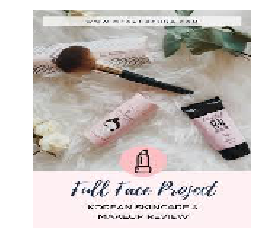

In [3]:
image = dataframe.at[69, 'Image']
plt.imshow(image)
plt.axis('off')

## 4. ConvNet
The Convolutional Neural Network will take an image as an input and return us if it has make-up or not. We have data in this moment made out of images and lables, so the input and the output of the network. We now need trainging and test data out of this data. For this, we need to randomly select makeup and no-makeup images for both collections. Also, normalization in this case is not absolutly needed, but we will apply it anyways just to make sure we don't have exploding gradients later.

Our architecture will consist of a Conv (2x2) + ReLu, then a Conv (4x4) + ReLu and finally a max pooling layer. We will repeat that 5 times, then we will flatten the result and feed it into 5 fully connected layers, ending on a Softmax. This means 7 Artificial Layers including the result layer. 

We have a total of 2124 images, we are going to use 500 for testing and 1624 for training. Lets start by getting that organized.

In [6]:
(train_images, train_labels) = (dataframe[:len(data)-500][['Image','Width','Height','Channels']].values,dataframe[:len(data)-500]['Makeup'].values)
(test_images, test_labels) = (dataframe[len(data)-500:][['Image','Width','Height','Channels']].values,dataframe[len(data)-500:]['Makeup'].values)

print(train_images.reshape(len(data)-500,1,1,1))
print(train_images[1].size)
print(train_images[2].size)
print(train_images[3].size)

ValueError: cannot reshape array of size 6496 into shape (1624,1,1,1)

In [ ]:
image_width = 128
image_height = 128
image_channels = 3

#1 conv
model = models.Sequential()
model.add(layers.Conv2D(16, (2,2), padding="same", activation='relu', input_shape=(image_width,image_height,image_channels)))
model.add(layers.Conv2D(32, (4,4), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

#2 conv
model.add(layers.Conv2D(32, (2,2), padding="same", activation='relu'))
model.add(layers.Conv2D(64, (4,4), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

#3 conv
model.add(layers.Conv2D(64, (2,2), padding="same", activation='relu'))
model.add(layers.Conv2D(128, (4,4), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

#4 conv
model.add(layers.Conv2D(128, (2,2), padding="same", activation='relu'))
model.add(layers.Conv2D(256, (4,4), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

#5 conv
model.add(layers.Conv2D(256, (2,2), padding="same", activation='relu'))
model.add(layers.Conv2D(512, (4,4), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Flatten
model.add(layers.Flatten())

#1 dense
model.add(layers.Dense(64, activation='relu'))

#2 dense
model.add(layers.Dense(64, activation='relu'))

#3 dense
model.add(layers.Dense(64, activation='relu'))

#4 dense
model.add(layers.Dense(64, activation='relu'))

#5 dense
model.add(layers.Dense(64, activation='relu'))

# Softmax
model.add(layers.Dense(2, activation='softmax'))

model.summary()

## 5. Training
Now that we have build a model and organized the data into a nice randomized batched, lets get started with training the beast! We need to define a few things first, like what type of optimizer we are going to use and the loss function. We are going to use Adam optimization and crossvalidation in this case.

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))